## ANSL-analysis and plotting

Michael Ernst (https://github.com/M-earnest)

In [1]:
# import necessary dependencies
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import scipy
import random
import os
import glob
import sklearn
from sklearn.preprocessing import MinMaxScaler
from __future__ import division #so 1/2 = 0.5, not 1/2=0

import plotly
import pandas as pd
import seaborn as sns

import librosa
import librosa.display


### ANSL data: cleaning/extraction: 
* at which point of volume and frequency stimuli was discovered
* presented in ascending or descending Volume condition
* order of stimuli presentation

#### first we need to extract the necessary information for plotting our results

In [2]:
from IPython.display import clear_output, Image, display


def extract_data(path):
    """ function to extract data from ansl output csv
    
    takes path to directory as input"""    
    # necessary lists for data extraction
    conditions = []
    items = []
    volumes = []
    frequencies = []
    orders = []
    settings = [] 
    subjects = []
    
    for filename in glob.iglob(path): # all specified files in directory
        df = pd.read_csv(filename)

        for i in df.columns:
            for item in df[i]:
                
                # get subject info
                subject = filename.split('/')
                subject = subject[6]
                subject = subject[:5]
                subjects.append(subject)
                

                item= item.split('/')
                item= item[2]
                items.append(item)
                
                # get info on setting
                setting = filename.split('/')
                if 'baseline' in filename:
                    settings.append('baseline')
                elif 'epi_fast(TR1s)' in filename:
                    settings.append('epi_fast(TR1s)')
                elif 'epi_standard(TR2s)' in filename:
                    settings.append('epi_standard(TR2s)')
                else:
                    settings.append('structural(T1w)')

                # get info on stimuli order
                if 'order1' in i:
                    orders.append('1')
                elif 'order2' in i: 
                    orders.append('2')
                
                # get info on volume condition
                if 'decrease' in i:
                    conditions.append('decrease')
                elif 'increase' in i:
                    conditions.append('increase')
                
                # extract discovered volume
                if '10dBFS' in item:
                    volumes.append(-10)
                elif '20dBFS' in item:
                    volumes.append(-20)
                elif '30dBFS' in item:
                    volumes.append(-30)
                elif '40dBFS' in item:
                    volumes.append(-40)
                elif '50dBFS' in item:
                    volumes.append(-50)
                elif '60dBFS' in item:
                    volumes.append(-60)
                elif '70dBFS' in item:
                    volumes.append(-70)
                elif '80dBFS' in item:
                    volumes.append(-80)
                elif '90dBFS' in item:
                    volumes.append(-90)
                elif '100dBFS' in item:
                    volumes.append(-100)
                elif 'not_discovered' in item:
                    volumes.append('0')
                
                if '150hz' in item:
                    frequencies.append(150)
                elif '250hz' in item:
                    frequencies.append(250)
                elif '500hz' in item:
                    frequencies.append(500)
                elif '1000hz' in item:
                    frequencies.append(1000)
                elif '1500hz' in item:
                    frequencies.append(1500)
                elif '2000hz' in item:
                    frequencies.append(2000)
                elif '2250hz' in item:
                    frequencies.append(2250)
                elif '2500hz' in item:
                    frequencies.append(2500)
                elif '2750hz' in item:
                    frequencies.append(2750)
                elif '3000hz' in item:
                    frequencies.append(3000)
                elif '4000hz' in item:
                    frequencies.append(4000)
                elif '6000hz' in item:
                    frequencies.append(6000)
                elif '8000hz' in item:
                    frequencies.append(8000)                    
    
    # write to dataframe
    df= pd.DataFrame({'subject': subjects,
                       'setting': settings,
                       'condition': conditions,
                       'order': orders,
                       'item' : items,
                       'Level (dBFS)' : volumes,
                       'Frequency (Hz)': frequencies})

    return df



# using *args allows to specify which files we want read into function
df = extract_data('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/sub_1/*_.csv')

display(df) # show dataframe for visual inspection
df

# save extracted data to csv
df.to_csv('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/ansl_data_plotting.csv', index=False)

,Frequency (Hz),Level (dBFS),condition,item,order,setting,subject
0,1000,-90,decrease,1000hz_minus_90dBFS.wav,1,baseline,data
1,500,-90,decrease,1500hz_minus_90dBFS.wav,1,baseline,data
2,2000,-90,decrease,2000hz_minus_90dBFS.wav,1,baseline,data
3,250,-90,decrease,2250hz_minus_90dBFS.wav,1,baseline,data
4,500,-90,decrease,2500hz_minus_90dBFS.wav,1,baseline,data
5,2750,-80,decrease,2750hz_minus_80dBFS.wav,1,baseline,data
6,3000,-90,decrease,3000hz_minus_90dBFS.wav,1,baseline,data
7,4000,-90,decrease,4000hz_minus_90dBFS.wav,1,baseline,data
8,6000,-90,decrease,6000hz_minus_90dBFS.wav,1,baseline,data
9,8000,-80,decrease,8000hz_minus_80dBFS.wav,1,baseline,data


In [3]:
df = pd.read_csv('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/ansl_data_plotting.csv')

In [4]:
# get  of aquired data
#stats = dfx.groupby('Frequency (Hz)')['Level (dBFS)'].describe().unstack()
#stats = pd.Series.to_frame(stats)
#stats = stats.unstack()
#stats = stats[0]

# relevant stats for 150 hz
#display(stats[150])
# count of 150hz
#display(stats[150].iloc[0])



###  get an better overview of your data

In [5]:

subject = 'sub-test'
display(df['Level (dBFS)'].mean())

df_dBFS = df.groupby(['subject','setting','condition','order','Frequency (Hz)']).aggregate('mean')



df_dBFS = df_dBFS.unstack()
df_dBFS = df_dBFS['Level (dBFS)']
df.to_csv('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/ansl_dataset.csv', index=False)


display(df_dBFS.columns)
df_dBFS

-74.375

Int64Index([150, 250, 500, 1000, 2000, 2750, 3000, 4000, 6000, 8000], dtype='int64', name='Frequency (Hz)')

Frequency (Hz)                              150   250        500   1000  2000  \
subject setting            condition order                                      
data    baseline           decrease  1     -90.0 -55.0 -90.000000 -90.0 -90.0   
                                     2     -90.0 -90.0 -63.333333 -90.0 -90.0   
                           increase  1     -90.0 -85.0 -86.666667 -90.0 -90.0   
                                     2     -90.0 -85.0 -86.666667 -90.0 -90.0   
        epi_fast(TR1s)     decrease  1     -40.0 -55.0 -63.333333 -60.0 -90.0   
                                     2     -40.0 -60.0 -70.000000 -60.0 -60.0   
                           increase  1     -40.0 -70.0 -66.666667 -40.0 -90.0   
                                     2     -20.0 -55.0 -63.333333 -60.0 -60.0   
        epi_standard(TR2s) decrease  1     -50.0 -65.0 -76.666667 -70.0 -70.0   
                                     2     -40.0 -60.0 -80.000000 -60.0 -70.0   
                           increase  1     -40.0 -60.0 -86.666667 -90.0 -80.0   
                                     2     -40.0 -60.0 -70.000000 -50.0 -80.0   
        structural(T1w)    decrease  1     -60.0 -75.0 -83.333333 -90.0 -90.0   
                                     2     -60.0 -80.0 -90.000000 -20.0 -90.0   
                           increase  1     -40.0 -65.0 -66.666667 -80.0 -80.0   
                                     2     -50.0 -55.0 -70.000000 -80.0 -80.0   

Frequency (Hz)                              2750  3000  4000  6000  8000  
subject setting            condition order                                
data    baseline           decrease  1     -80.0 -90.0 -90.0 -90.0 -80.0  
                                     2     -80.0 -90.0 -80.0 -80.0 -80.0  
                           increase  1     -90.0 -90.0 -90.0 -80.0 -90.0  
                                     2     -90.0 -90.0 -90.0 -80.0 -90.0  
        epi_fast(TR1s)     decrease  1     -70.0 -70.0 -70.0 -80.0 -60.0  
                                     2     -70.0 -90.0 -70.0 -80.0 -70.0  
                           increase  1     -70.0 -80.0 -70.0 -80.0 -80.0  
                                     2     -70.0 -70.0 -70.0 -80.0 -80.0  
        epi_standard(TR2s) decrease  1     -80.0 -80.0 -80.0 -80.0 -70.0  
                                     2     -80.0 -90.0 -70.0 -70.0 -60.0  
                           increase  1     -80.0 -90.0 -80.0 -80.0 -80.0  
                                     2     -80.0 -80.0 -80.0 -80.0 -80.0  
        structural(T1w)    decrease  1     -80.0 -90.0 -80.0 -80.0 -70.0  
                                     2     -80.0 -90.0 -80.0 -80.0 -80.0  
                           increase  1     -80.0 -80.0 -80.0 -80.0 -80.0  
                                     2     -80.0 -80.0 -80.0 -80.0 -80.0

#### _if you want to split your dataframe by some condition use the [groupby function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)_

In [6]:
# how to use groupby
grouped = df.groupby('condition')

for name, group in grouped:
   # print(name)
    #print(group)
    if name == 'increase':
        df_increase = pd.DataFrame(group)
    else:
        df_decrease = pd.DataFrame(group)


#### get basic values (means, sd, etc.) 

In [7]:

def get_stats(dataframe):
    """ 
    function to calculate statistics of data and write them to df
    
    takes dataframe created by 'extract_data' function as input
    """
    # groupby frequency and calculate mean volume etc.
    stats = dataframe.groupby('Frequency (Hz)')['Level (dBFS)'].describe().unstack()

    stats = pd.Series.to_frame(stats)
    stats = stats.unstack()
    stats = stats[0]

    freqs = []
    counts = []
    means = []
    sds = []
    mins_ = []
    maxs_ = []
    medians = []
    per25s = []
    per75s = []
    
    # write values for each frequency into lists
    for item in stats:
        freq = item
        count = stats[item].iloc[0]
        mean = stats[item].iloc[1]
        sd = stats[item].iloc[2]
        min_ = stats[item].iloc[3]
        max_ = stats[item].iloc[4]
        per25 = stats[item].iloc[5]
        median = stats[item].iloc[6]
        per75 = stats[item].iloc[7]   
        freqs.append(item)
        means.append(mean)
        counts.append(count)
        sds.append(sd)
        mins_.append(min_)
        maxs_.append(max_)
        medians.append(median)
        per25s.append(per25)
        per75s.append(per75)


    df_mean= pd.DataFrame({'Frequency (Hz)': freqs, 'mean_dBFS': means,
                           'standard_deviation': sds, 'min': mins_,
                           'max': maxs_, 'median': medians, 
                           '25%': per25s, '75%': per75s})
    

    
    return df_mean


df_mean = get_stats(df)
display(df_mean)
# save csv
df_mean.to_csv('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/ansl_stats.csv', index=False)

,25%,75%,Frequency (Hz),max,mean_dBFS,median,min,standard_deviation
0,-45.0,-20.0,150,-67.5,-55.000000,-40.0,-90.0,22.803509
1,-70.0,-20.0,250,-80.0,-67.187500,-57.5,-90.0,16.893285
2,-80.0,-20.0,500,-90.0,-75.833333,-67.5,-90.0,14.707551
3,-75.0,-20.0,1000,-90.0,-70.000000,-60.0,-90.0,21.291626
4,-85.0,-60.0,2000,-90.0,-81.250000,-77.5,-90.0,10.878113
5,-80.0,-70.0,2750,-80.0,-78.750000,-77.5,-90.0,6.191392
6,-90.0,-70.0,3000,-90.0,-84.375000,-80.0,-90.0,7.274384
7,-80.0,-70.0,4000,-80.0,-78.750000,-70.0,-90.0,7.187953
8,-80.0,-70.0,6000,-80.0,-80.000000,-80.0,-90.0,3.651484
9,-80.0,-60.0,8000,-80.0,-76.875000,-70.0,-90.0,8.732125


### Plotting the mean dBFS at which each frequency was discovered

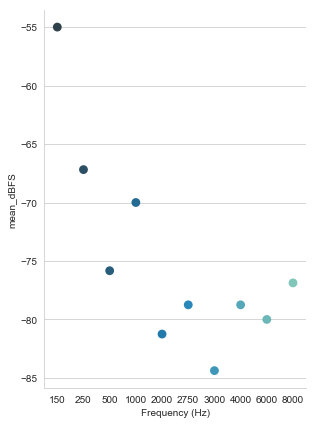

In [8]:
sns.set_style('whitegrid')
sns.catplot(data=df_mean,y = 'mean_dBFS', x = 'Frequency (Hz)',
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point")


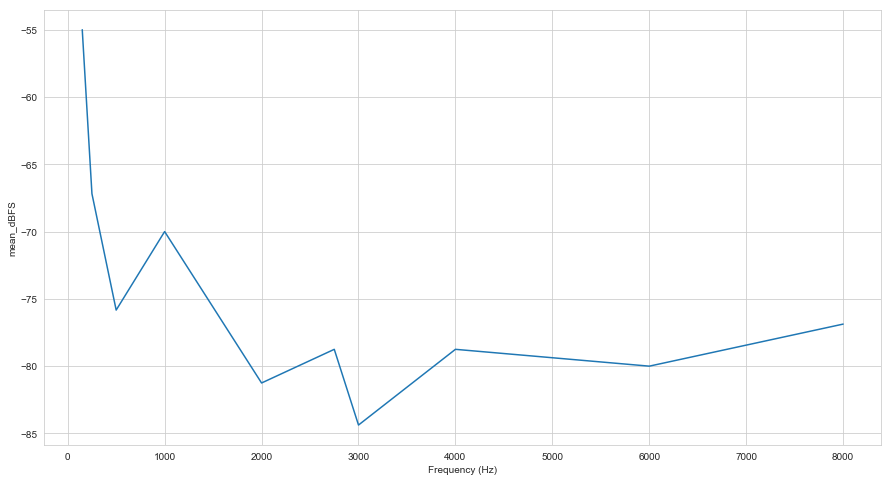

In [9]:
plt.figure(figsize=(15,8))
#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
sns.despine()
helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.lineplot(x = df_mean['Frequency (Hz)'], y = df_mean['mean_dBFS'], palette="BuGn", alpha = 1)
#sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

### ANSL data:  Plots 

#### _overall_

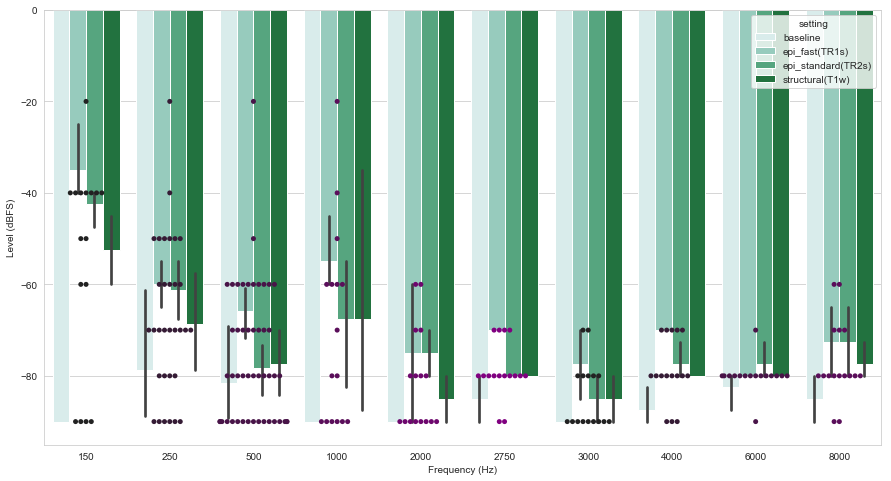

In [10]:
plt.figure(figsize=(15,8))

helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.barplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'],hue = df['setting'], palette="BuGn")
sns.swarmplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'], palette=helix)


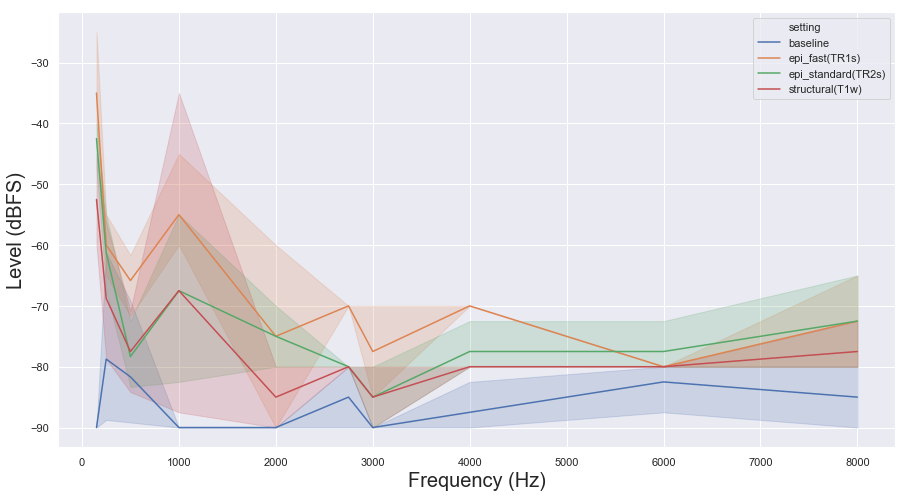

In [11]:
def plot_overview_linegraph(df):
    """ simple function to plot data
    show overview of data as linegraph including scatterplot
    """
    sns.set_context('paper')
    sns.set_style('darkgrid')
    
    plt.figure(figsize=(15,8))
    #sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
    #sns.despine()
    #helix = sns.dark_palette("purple")
    #husl1 = sns.light_palette((210, 90, 60), input="husl")
    
    sns.set(font_scale = 1)

    g = sns.lineplot(y = df['Level (dBFS)'], x = df['Frequency (Hz)'],
                 hue = df['setting'], #palette="BuGn", 
                 alpha = 1)
    #sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

    g.set_xlabel("Frequency (Hz)",fontsize=20)
    g.set_ylabel("Level (dBFS)",fontsize=20)
    
    
    #pal = dict(increase="seagreen", decrease="gray")
    #gr = sns.FacetGrid(df, hue="condition", #palette=pal,
    #                  height=5, aspect=6)
    #gr.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7,
    #      linewidth=.5, edgecolor="white")
    #gr.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1,
    #      linewidth=.5,palette='BuGn')
    #gr.add_legend();

plot_overview_linegraph(df)

/Users/peerherholz/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



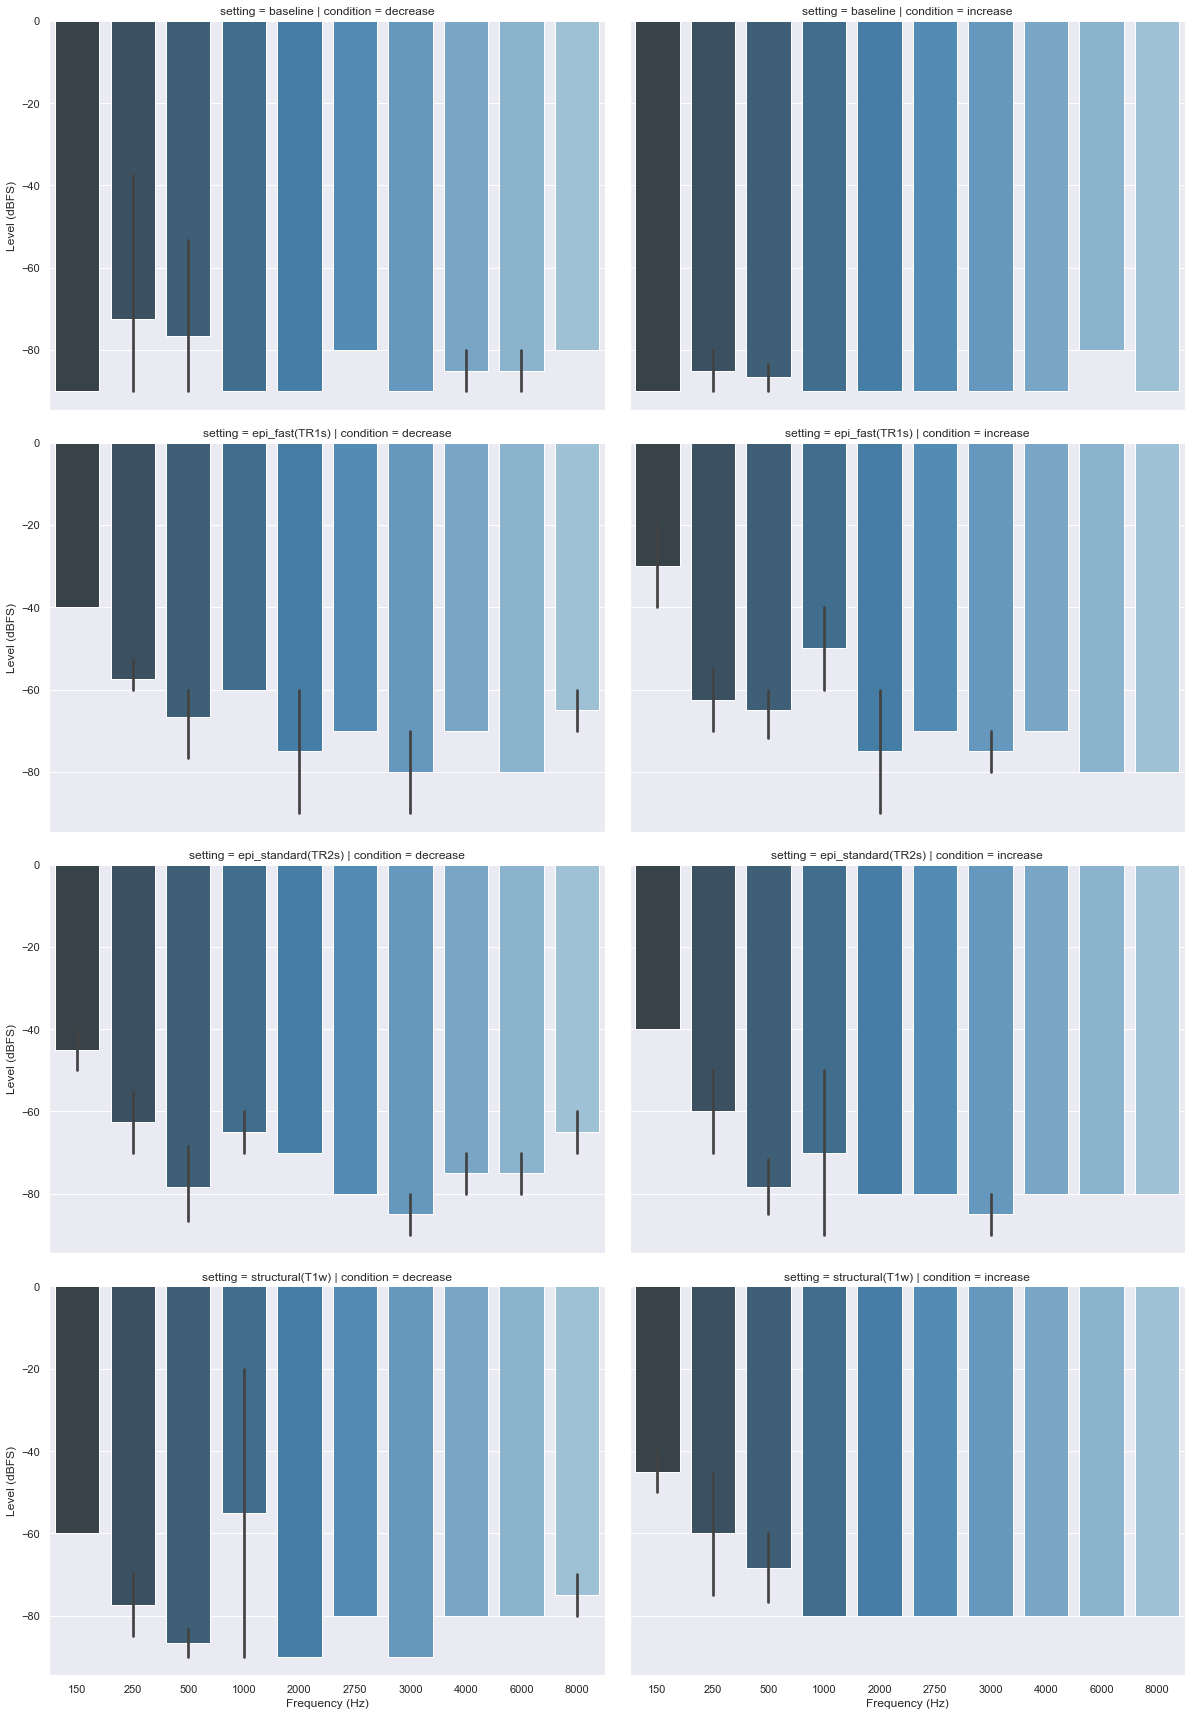

In [12]:
def plot_settings_barplot(dataframe):
    """ simple function to plot data
    
    show overview of data as barplot
    """
    plt.figure(figsize=(30,10))
    g = sns.FacetGrid(dataframe, col="condition",
                      row="setting", height=6, aspect=1.4)
    g.map(sns.barplot, "Frequency (Hz)", "Level (dBFS)",palette="Blues_d");
    
plot_settings_barplot(df)

#### _by condition: increasing/decreasing_

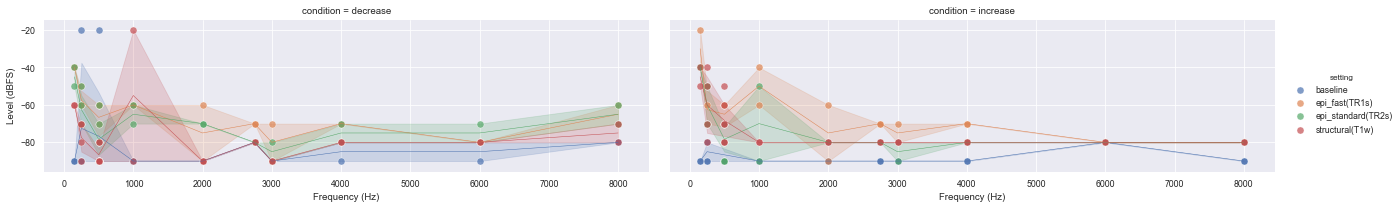

In [13]:
def plot_condition_overview(df):
    """ simple function to plot data
    
    show data separated by descending and ascendning volume
    as linegraph including scatterplot
    """
    sns.set_context('paper')
    sns.set_style('darkgrid')
    
    g = sns.FacetGrid(df, col="condition",  hue="setting",
                      height=3, aspect=3)#,palette="Blues_d")
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7,
          linewidth=.5, edgecolor="white")
    g.add_legend()
    
    current_palette = sns.color_palette()
    
    return current_palette
    
current_palette = plot_condition_overview(df)

##### _by mri-settings_

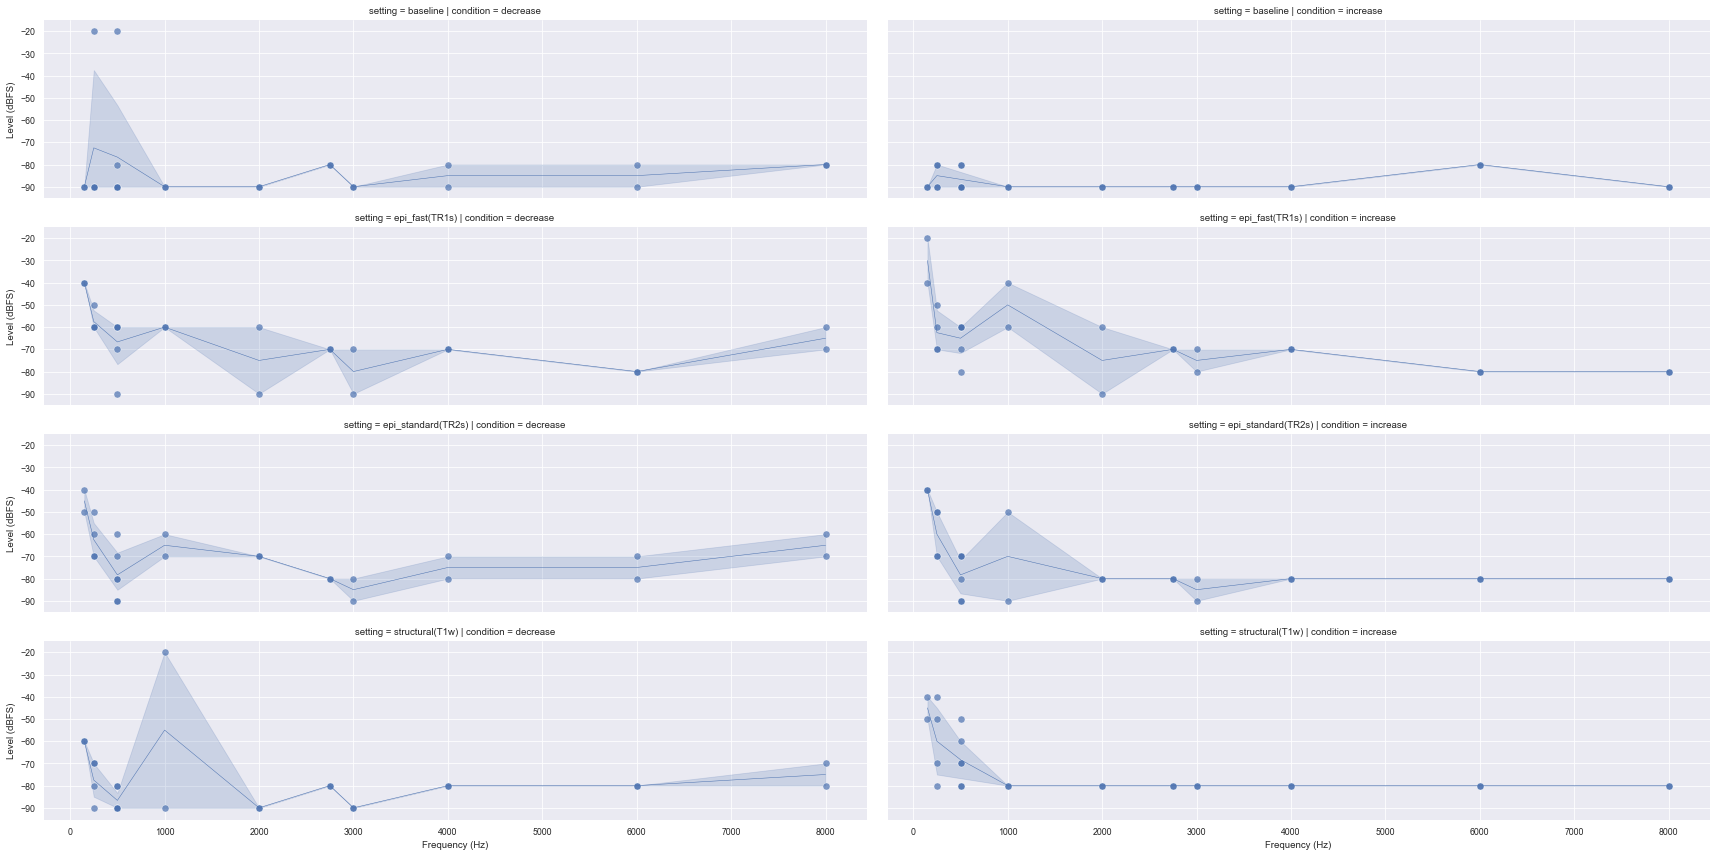

In [14]:
def plot_settings_overview(df):
    """ 
    simple function to plot data
    
    show data separated by mri-settings as linegraph including scatterplot
    """
    sns.set_context('paper')
    sns.set_style('darkgrid')
    
    g = sns.FacetGrid(df, col="condition", row="setting",height=3, aspect=4)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)#,palette="Blues_d")
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=.7, linewidth=.5, edgecolor="white")

plot_settings_overview(df)

In [15]:
current_palette[0]


(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

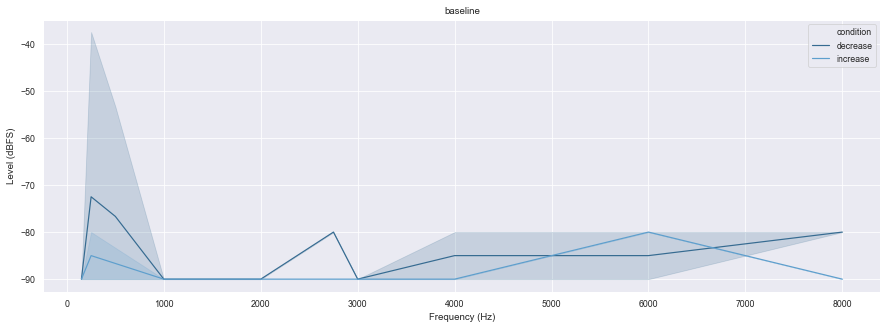

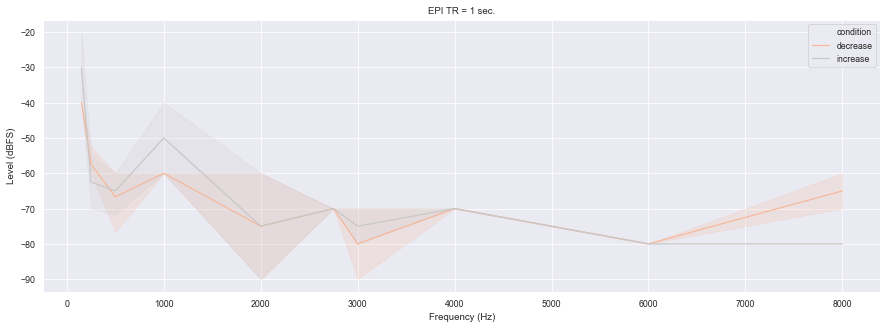

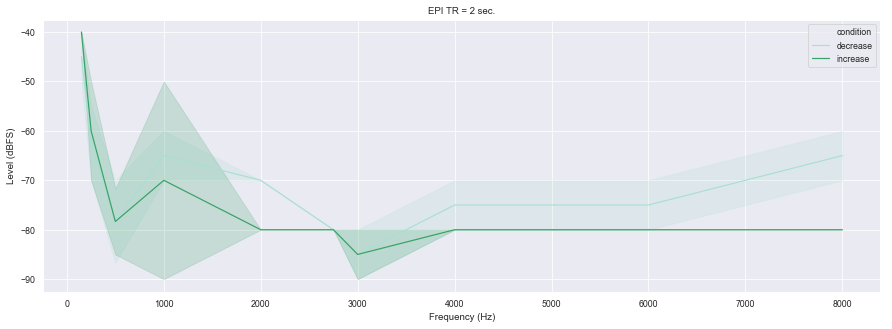

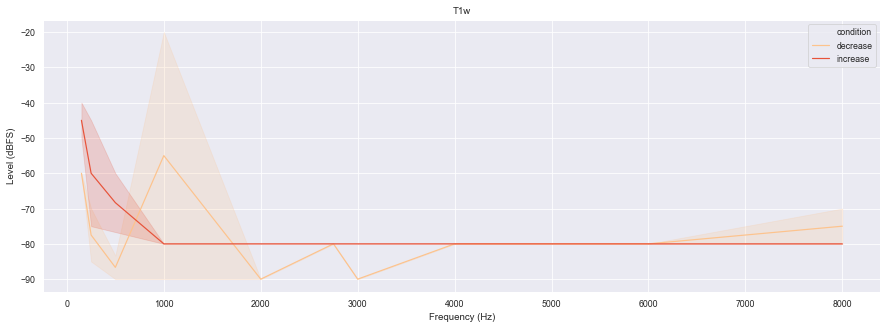

In [48]:
def plot_mri_settings(df):
    """ 
    function to group data by mri_settings and plot data
    
    returns data for each mri setting as dataframe and plot as linegraph
    """
    grouped = df.groupby('setting')

    sns.set_context('paper')
    sns.set_style('darkgrid')
    
    for name, group in grouped:
        
        if 'baseline'in name:
            df_base = pd.DataFrame(group)
        elif 'epi_fast' in name:
            df_tr1 = pd.DataFrame(group)
        elif 'epi_standard'in name:
            df_tr2 = pd.DataFrame(group)
        elif 'T1w' in name:
            df_t1w = pd.DataFrame(group)

    # baseline
    #sns.set_style('whitegrid')
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_base,y = df_base['Level (dBFS)'], x = df_base['Frequency (Hz)'],hue = df_base['condition']
                 , palette="Blues_d", alpha = 1)
    plt.title('baseline')

    # epi fast
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_tr1,y = df_tr1['Level (dBFS)'], x = df_tr1['Frequency (Hz)'],hue = df_tr1['condition'],
                 palette="RdGy", alpha = 1)
    plt.title('EPI TR = 1 sec.')

    # epi standard
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_tr2,y = df_tr2['Level (dBFS)'], x = df_tr2['Frequency (Hz)'],hue = df_tr2['condition'],
                 palette=("BuGn"), alpha = 1)
    plt.title('EPI TR = 2 sec.') 

    # T1
    plt.figure(figsize=(15,5))
    sns.despine()
    sns.lineplot(data=df_t1w,y = df_t1w['Level (dBFS)'], x = df_t1w['Frequency (Hz)'],hue = df_t1w['condition'],
                 palette=("OrRd"), alpha = 1)
    plt.title('T1w')

    return df_base,df_tr1, df_tr2, df_t1w

df_base,df_tr1, df_tr2, df_t1w = plot_mri_settings(df)

##### _including scatterplot_

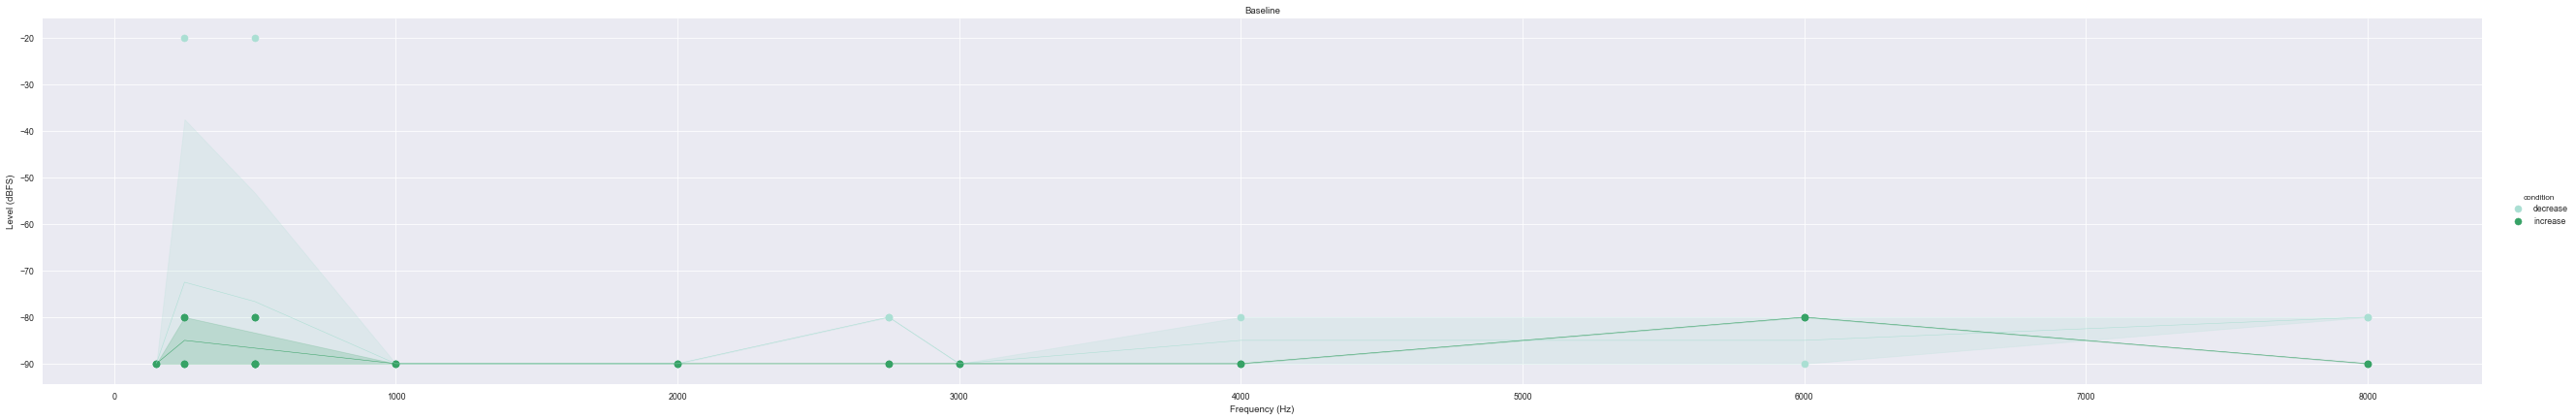

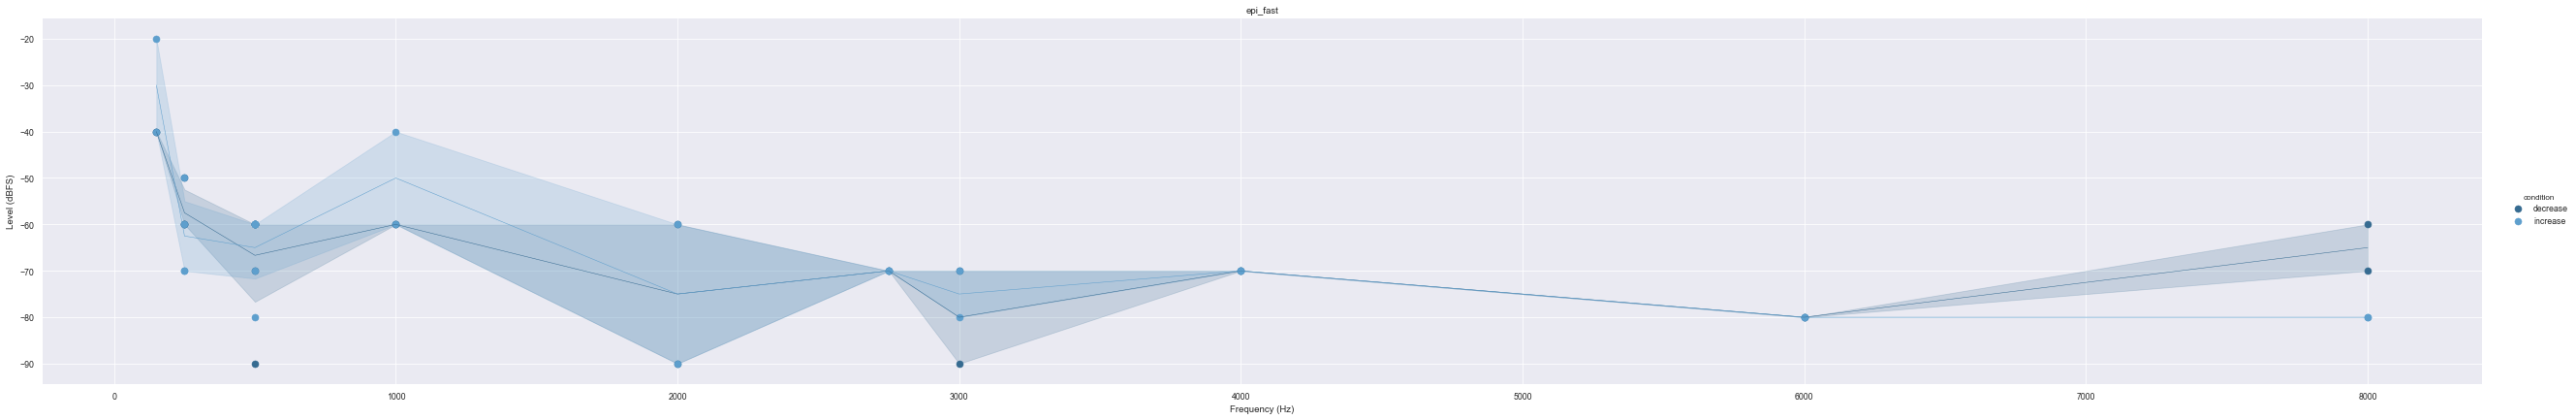

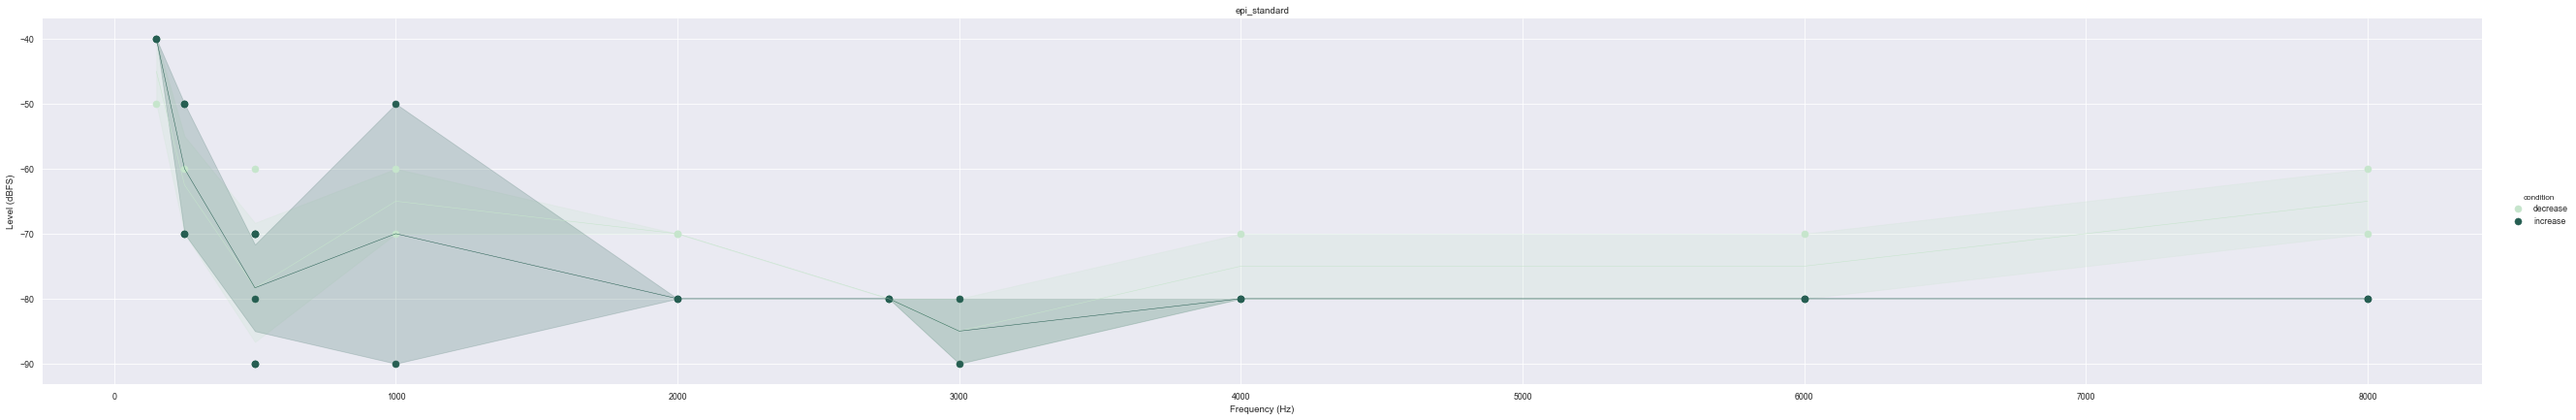

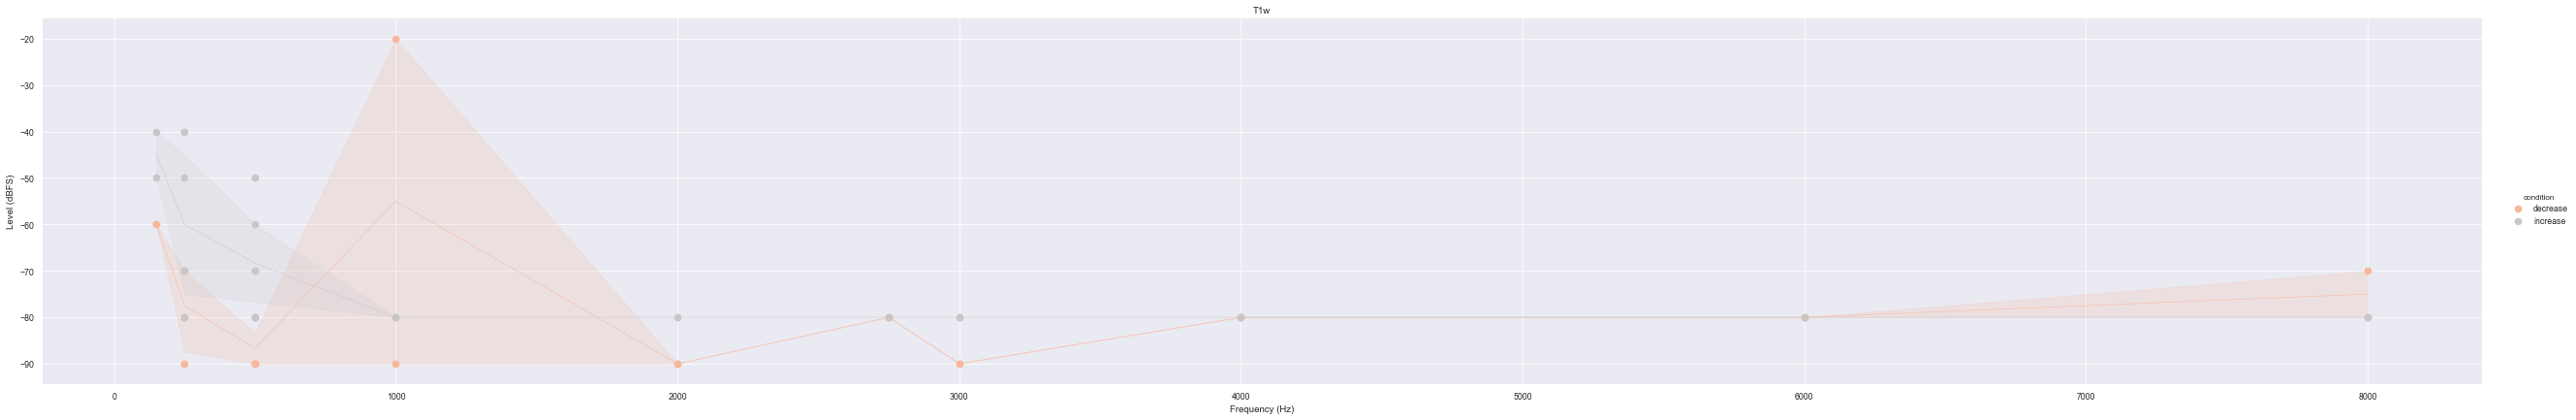

In [17]:
def plot_mri_settings_scatter(df):
    """ 
    function to group data by mri_settings and plot data
    
    returns data for each mri setting as dataframe and plot as linegraph
    inclding scatterplot
    """    
    grouped = df.groupby('setting')

    for name, group in grouped:
        
        if 'baseline'in name:
            df_base = pd.DataFrame(group)
        elif 'epi_fast' in name:
            df_tr1 = pd.DataFrame(group)
        elif 'epi_standard'in name:
            df_tr2 = pd.DataFrame(group)
        elif 'T1w' in name:
            df_t1w = pd.DataFrame(group)
    
    g = sns.FacetGrid(df_base,hue='condition', height=6, aspect=6,palette='BuGn')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('Baseline')
    g.add_legend()
    sns.despine()


    g = sns.FacetGrid(df_tr1,hue='condition', height=6, aspect=6,palette='Blues_d')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('epi_fast')
    g.add_legend()
    sns.despine()

    g = sns.FacetGrid(df_tr2,hue='condition', height=6, aspect=6,palette=("ch:2.5,-.2,dark=.3"))
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('epi_standard')
    g.add_legend()
    sns.despine()



    g = sns.FacetGrid(df_t1w,hue='condition', height=6, aspect=6,palette='RdGy')
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('T1w')
    g.add_legend()
    sns.despine()
    return df_base,df_tr1, df_tr2, df_t1w 

df_base,df_tr1, df_tr2, df_t1w = plot_mri_settings_scatter(df)

### Plotting: displaying results of ansl overlayed with common mri-frequencies
* **_(highly recommended that you aquire data for your specific mri)_**
* extracting frequencies uesd in different settings (aquired via mri-compatible microphone) 

* here we will be using audacity again, as our main ressource to extract the volume of each frewuency in our recording of mri sounds. Audacity can be downloaded _[here](https://www.audacityteam.org)_

  * to do this:
          -> click file > open > select your audio recording
          -> mark an intervall that you want to analyse
          -> click analyze > plot spectrum
          -> which will open a popup window where you will be able to specify certain parameters
              - set: axis = linear frequency
                     size = 4096

           -> click export -> export as wav
           -> repeat this step for every recording you want to include
          
   -> the output of this will be used here to plot volume per frequency for stimuli or mri audio recordings

#### _Let's first take a look at our audio file_

In [18]:
#source: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
from scipy.io import wavfile

rate, audio = wavfile.read('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_5tr.wav') # exchange string for your file
audio = np.mean(audio, axis=1)


#### _as a spectogram_ using [librosa](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html)

In [19]:
y, sr = librosa.load('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_5tr.wav')
librosa.feature.melspectrogram(y=y, sr=sr)

array([[7.53980739e-01, 1.10364087e+00, 2.42058355e+00, ...,
        5.48429637e+00, 9.32906870e-01, 3.91300491e-01],
       [5.43385348e-01, 3.22812335e-01, 2.37279932e-01, ...,
        8.42717780e-01, 1.03714986e+00, 2.29353435e+00],
       [2.07008093e-01, 1.65957287e-01, 4.51420219e-01, ...,
        4.89581064e-01, 6.18854774e-01, 4.58194849e+00],
       ...,
       [2.14549347e-03, 1.61028400e-03, 1.47391463e-03, ...,
        1.80830181e-03, 2.07101276e-03, 1.38556079e-03],
       [9.10719166e-04, 5.36894685e-04, 3.07911876e-04, ...,
        5.76240412e-04, 4.89022182e-04, 5.22329056e-04],
       [1.64069841e-04, 6.30849744e-05, 3.17793485e-05, ...,
        4.83463509e-05, 4.24640542e-05, 4.16624760e-05]])

In [20]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

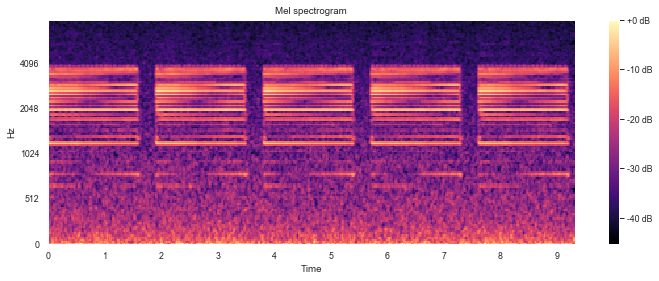

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [22]:
def get_audio_data(file):
    """ 
    function to extract and clean audio file
    
    returns dataframe including volume for each frequency 
    in data
    """
    audio = pd.read_table(file)
    audio = audio[audio["Frequency (Hz)"] < 8000]
    audio.rename(columns={'Level (dB)':'Level (dBFS)'}, inplace=True)
    
    return audio
t1 = get_audio_data('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_spectrum_4000.txt')

In [23]:
def rename_columns(df):
    """ 
    function to rename columns to allow for easier plotting
    of mri  audio recordings compared to ansl output
    """
    df.rename(columns={'dBFS':'Level (dBFS)'}, inplace=True)
    df['Frequency (Hz)'].astype(float)
    return df

df_t1w = rename_columns(df_t1w)
df_mean = rename_columns(df_mean)              

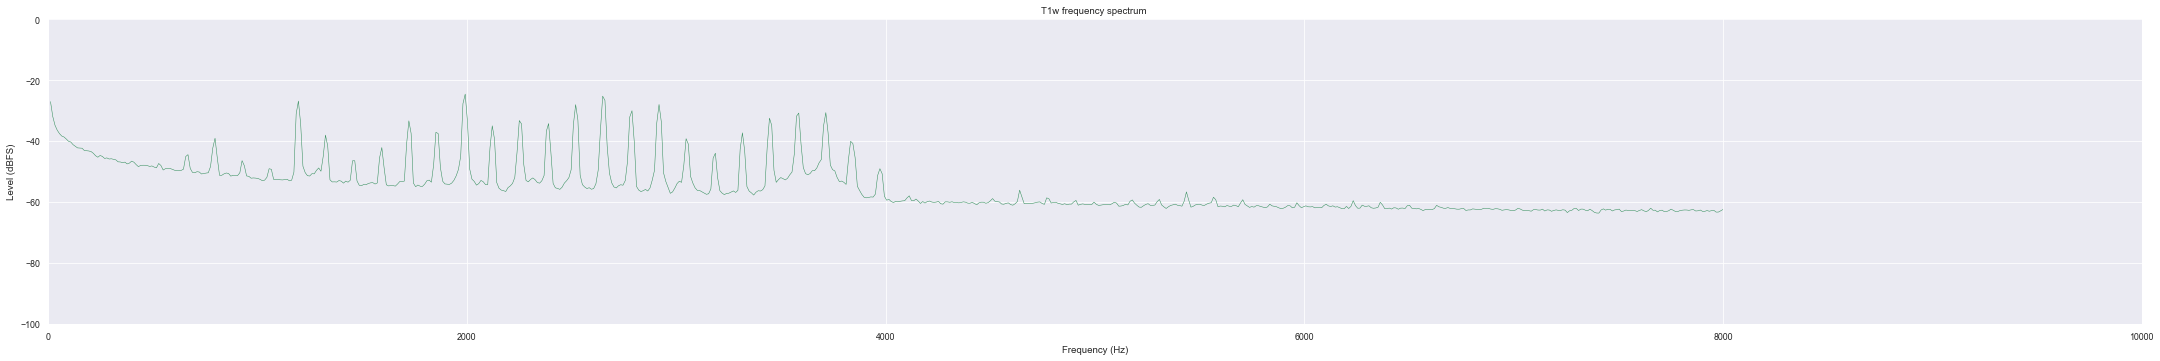

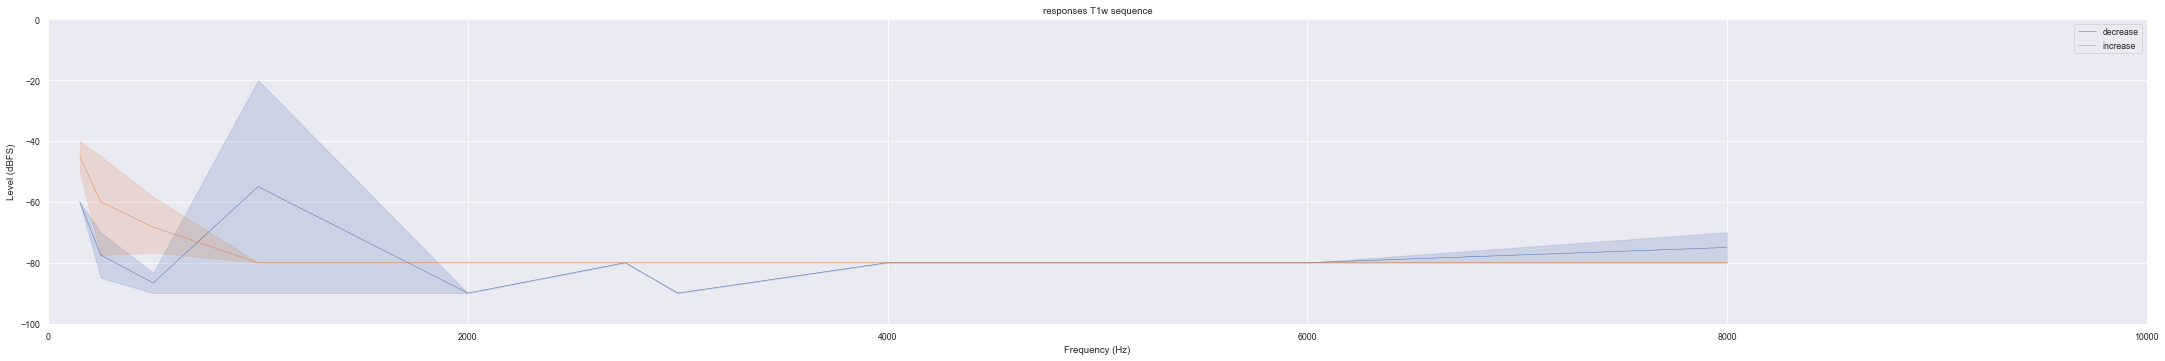

In [50]:
def plot_comparision(df1,df2):
    """ 
    function to plot volume per frequency for mri audio data
    and mean volume of frequency by ansl
    """
    g = sns.FacetGrid(df1, height=5, aspect=6,palette=("Set2"),sharex=True,sharey=True)
    plt.xlim(0,-100)
    plt.xlim(0,8000)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5, color='seagreen')
    #g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    plt.title('T1w frequency spectrum ')
    plt.ylim(-100, 0)

    plt.xlim(0,10000)
    #g.add_legend()
    sns.despine()



    g = sns.FacetGrid(df2,hue='condition', height=5, aspect=6)
    #g.map(plt.scatter, "Frequency (Hz)", "Level (dBFS)", s=50, alpha=1, linewidth=.5)
    g.map(sns.lineplot, "Frequency (Hz)", "Level (dBFS)", alpha=1, linewidth=.5)
    plt.title('responses T1w sequence')
    #g.add_legend()
    L=plt.legend(loc='upper right')
    #L.get_texts()[0].set_text('decrease')
    plt.ylim(-100, 0)

    plt.xlim(0,10000)
    sns.despine()
    
plot_comparision(t1,df_t1w)

### we'll further display the frequencies of our mri noise as straight lines, whoose transparency will represent the volumen of the given frequency

In [25]:

def alpha_scaling(df):
    """ 
    function to scale extracted volume in a range from 0 (lowest volume in data)
    and 1 (highest volume in data)
    
    returns scaled (scaled volume per frequency as df) and 
    xyz_shape (dimensions of df)
    """
    xyz = (df['Level (dBFS)'])
    xyz = pd.DataFrame(xyz)
    xyz_shape = xyz.shape
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    scaled = scaler.fit(xyz)
    scaled = scaler.transform(xyz)
    scaled = scaled.reshape(xyz_shape[0])
    scaled.shape
    scaled = pd.DataFrame({'db_transformed':scaled})
    return scaled, xyz, xyz_shape

def draw_lines(dataframe, xyz_shape, position_lines, half_height):
    """ 
    function to draw lines to overlay over plot for each frequency in input data
    
    takes df, xyz_shape (dimensions of df), the position(from where to where the lines 
    should be drawn, and half_height (if lines should be drawn over the complete plot
    or just half of it)) 
    
    returns coordinates for plotting
    """
    counter = 0
    coordinates = []
    lines = []
    
    for item in t1['Frequency (Hz)']:
        frequency_coordinates = tuple([t1['Frequency (Hz)'].iloc[counter],t1['Frequency (Hz)'].iloc[counter]])

        if half_height is True:
            line_coordinates = position_lines

        if half_height is False:
            line_coordinates = tuple([-100,0])
        
        coordinates.append(frequency_coordinates)
        lines.append(line_coordinates)
        counter +=1
    coordinates_array = np.array(coordinates)
    coordinates= pd.DataFrame({'x_coordinates': coordinates, 'y_coordinates': lines})
    
    x_coordinates = np.array(coordinates['x_coordinates'])
    x = x_coordinates.shape
    x[0]
    x_coordinates = x_coordinates.reshape(xyz_shape[0])

    y_coordinates = np.array(coordinates['y_coordinates'])
    y = y_coordinates.shape
    y[0]
    y_coordinates= y_coordinates.reshape(xyz_shape[0])
    return x_coordinates, y_coordinates, coordinates



In [26]:
def analyze_mri_noise(item, half_height):
    """ 
    function to analyze mri audio recording
    
    takes path to audio data as input and half_height(if lines should be
    drawn over the complete plot or just half of it))  
    
    returns coordinates for plotting"""
    df = get_audio_data(item)
    scaled, xyz, xyz_shape = alpha_scaling(df)
    position_lines = tuple([-50,0])
    x_coordinates, y_coordinates, coordinates = draw_lines(df,xyz_shape, position_lines, half_height)
    
    return x_coordinates, y_coordinates, coordinates, scaled
x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_spectrum_4000.txt',
                                                                     half_height =False)

In [27]:

def analyze_stimuli(item):
    """ 
    function to analyze data of stimuli recording
    
    takes path to audio data as input and half_height(if lines should be
    drawn over the complete plot or just half of it))  
    
    returns coordinates for plotting"""
    stimuli = get_audio_data(item)
    scaled, xyz, xyz_shape = alpha_scaling(stimuli)
    position_lines = tuple([-100,-50])
    x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli = draw_lines(stimuli, xyz_shape,
                                                                                   position_lines,
                                                                                   half_height = True)
    return x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled
x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled_stimuli = analyze_stimuli('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/metal_spectrum_4000.txt')

In [28]:
df_t1w_mean = get_stats(df_t1w)

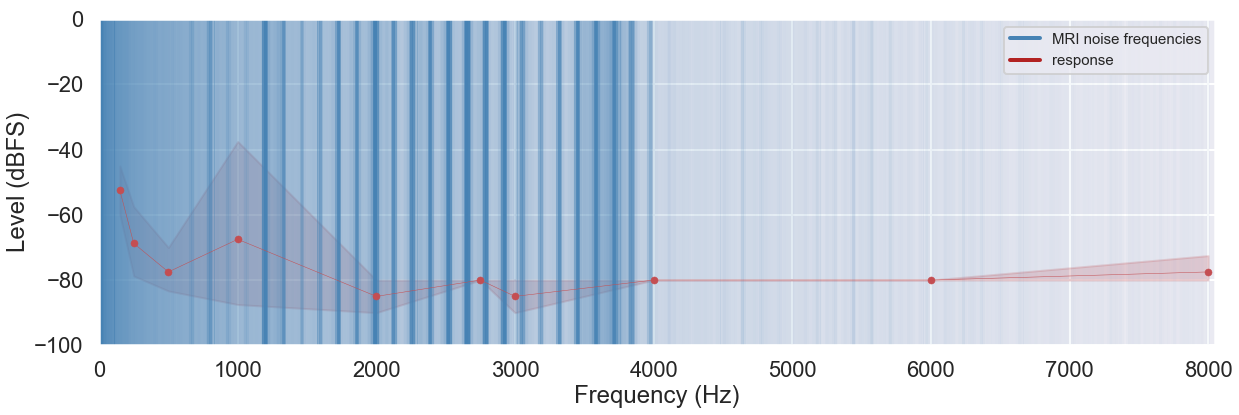

In [31]:

def plot_mri_overlay(x_coordinates, y_coordinates, coordinates, df):
    """
    function to plot results of ansl (mean volume per frequency) 
    overlayed with mri frequencies with their respective volumes
    represented by the transparency of the overlayed lines
    
    takes coorinates of 'analyze_mri_noise' as input
    """
    sns.set_style('darkgrid')
    sns.set_context("poster")
    plt.figure(figsize=(20,6))
    plt.xlim(0,8050)
    plt.ylim(-100, 0)

    counter = 0
    for i in x_coordinates:
        plt.plot(x_coordinates[counter],y_coordinates[counter], 'k-', color="steelblue",
                 alpha=scaled['db_transformed'].iloc[counter])
        counter +=1
    mean = get_stats(df)
    sns.lineplot((df["Frequency (Hz)"]), (df["Level (dBFS)"]), alpha=1, linewidth=.5, color='r')
    plt.scatter(mean["Frequency (Hz)"], mean["mean_dBFS"], s=50, alpha=1, linewidth=.5,color='r',zorder=5)
    
    legend_elements = [Line2D([0], [0], color='steelblue', lw=4, label='Line'),
                       Line2D([0], [0], color='firebrick', lw=4, label='Line')]
    
    plt.legend(legend_elements, ['MRI noise frequencies', 'response'], loc='upper right', prop={'size': 15})


x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_spectrum_4000.txt',
                                                                     half_height =False)
plot_mri_overlay(x_coordinates, y_coordinates, coordinates, df_t1w)

### Plotting: displaying results of ansl overlayed with common frequencies in stimuli material  

		- example: frequency spectrum of a typical 'metal'-snippet in green and frequency spectrum of a t1 mrisequence in blue
        

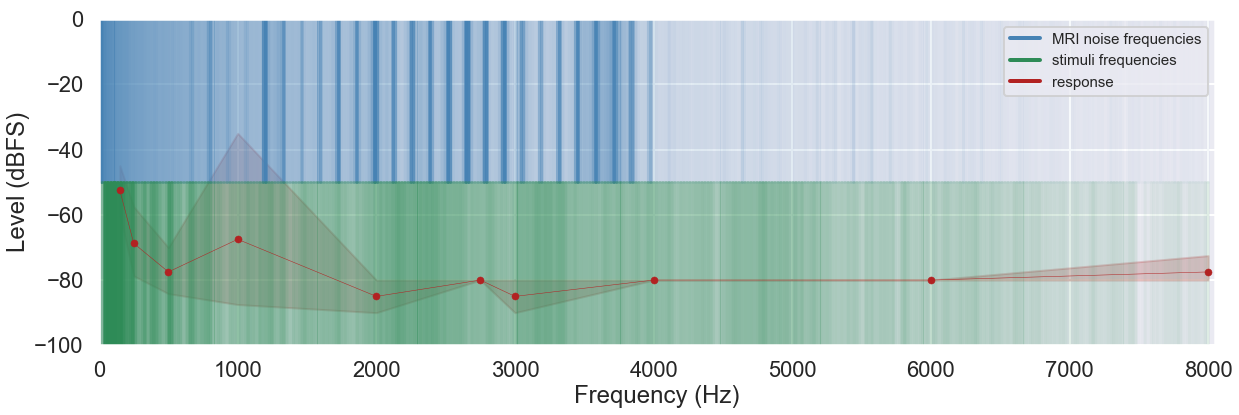

In [30]:

#x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli, scaled_stimuli = analyse_stimuli('/home/michael/Documents/metal_spectrum_4000.txt')

def plot_mri_stimuli_comparision(x_coordinates, y_coordinates, coordinates, scaled,
                                 x_coordinates_stimuli, y_coordinates_stimuli,
                                 coordinates_stimuli, scaled_stimuli, df):
    """
    function to plot results of ansl (mean volume per frequency) 
    overlayed with mri frequencies and stimuli frequencies with their respective volumes
    represented by the transparency of the overlayed lines
    
    takes coorinates of 'analyze_mri_noise' as input
    """
    sns.set_style('darkgrid')
    sns.set_context("poster")
    plt.figure(figsize=(20,6))
    plt.xlim(0,8050)
    plt.ylim(-100, 0)

    counter = 0
    for i in x_coordinates:
        plt.plot(x_coordinates[counter],y_coordinates[counter], 'k-', color="steelblue",
                 alpha=scaled['db_transformed'].iloc[counter])
        counter +=1

    counter = 0

    for i in x_coordinates_stimuli:
        plt.plot(x_coordinates_stimuli[counter],y_coordinates_stimuli[counter], 'k-', color="seagreen",
                 alpha=scaled_stimuli['db_transformed'].iloc[counter])
        counter +=1
    
    mean = get_stats(df)
    sns.lineplot((df["Frequency (Hz)"]), (df["Level (dBFS)"]),
                 alpha=1, linewidth=.5, color='firebrick')
    plt.scatter(mean["Frequency (Hz)"], mean["mean_dBFS"],
                s=50, alpha=1, linewidth=.5,color='firebrick',zorder=5)

    legend_elements = [Line2D([0], [0], color='steelblue', lw=4, label='Line'),
                       Line2D([0], [0], color='seagreen', lw=4, label='Line'),
                       Line2D([0], [0], color='firebrick', lw=4, label='Line')]
    
    plt.legend(legend_elements, ['MRI noise frequencies', 'stimuli frequencies', 'response'], loc='upper right', prop={'size': 15})

    
x_coordinates, y_coordinates, coordinates, scaled = analyze_mri_noise('/Users/peerherholz/google_drive/GitHub/audiometry_mri/data/t1_spectrum_4000.txt',
                                                                     half_height =True)
plot_mri_stimuli_comparision(x_coordinates, y_coordinates, coordinates, scaled,
                             x_coordinates_stimuli, y_coordinates_stimuli, coordinates_stimuli,
                             scaled_stimuli, df_t1w )
